
Name: İlke Başak Baydar

ID: 150140709 


In [1]:
%load_ext autoreload
%autoreload 2

# HW2: UNSUPERVISED LEARNING WITH AUTOENCODERS

In this homework, you will implement two types of Autoencoders (Basic, and Variational) by using NumPy and PyTorch libraries. For the first question, you will implement and analyze a conventional autoencoder by using only NumPy. For the second question, you will implement a variational autoencoder by using PyTorch. For any of your questions, feel free to e-mail: ergunesr@itu.edu.tr .


## What is an Autoencoder?
An autoencoder is a neural network that is traind to reconstruct its input. It is an unsupervised learning algorithm, the goal is to learn an informative representation of the input data. In this homework, you will implement two autoencoder algorithms for unsupervised learning of an image dataset, MNIST. Before explaining the homework, we will briefly review what autoencoder is. 
    
Now suppose we have only an unlabeled training set 
$ \mathbf{x}=\{ x^{(1)}, x^{(2)}, x^{(3)}, \ldots \} $ , where $x^{(i)} \in \mathbb{R}^n $ . An autoencoder neural network is an unsupervised learning algorithm that applies backpropagation, setting the target values to be equal to the inputs. 
i.e., it uses $y^{(i)} = x^{(i)}$.

 The problem, is to learn the functions   $ A : \mathbb{R}^n \rightarrow \mathbb{R}^p $ (encoder) and  $ B : \mathbb{R}^p \rightarrow \mathbb{R}^n $ (decoder) that satisfy

$$
\arg\min_{A,B} \; \mathbb{E}\!\left[\Delta(\mathbf{x},\, (B \circ A)(\mathbf{x}))\right],
$$

where $ \mathbb{E} $ is the expectation over the distribution of $ \mathbf{x} $ , and  $ \Delta $ is the reconstruction loss function, which measures the distance between the output of the decoder and the input. The encoder $A$ and the decoder $B$ are neural networks.

If the input were completely **random**, say, each $x_i$ comes from an IID Gaussian independent, this compression task would be very difficult. But, if there is a structure in  the data, for example, if some of the input features are correlated, then this algorithm will be able to discover some of those correlations. Further, in the special case where $A$ and $B$ are linear operators, we get linear autoencoders. An autoencoder can be used for compressing the input, or for overcoming the curse of dimensionality. 

Below is an example autoencoder pipeline. Input is an image sample from MNIST dataset. 


![An example autoencoder](autoencoder_image.png)



#### Regularized Autoencoders

The trivial solution in Autoenconders training is solving for identity functions. if the capacity of the encoder and the decoder is large enough to encode each sample to an index, the model would simply overfit. To avoid this, we need regularization. The most common way to regularize an autoencoder is to impose a bottleneck. This means we will directly map the input $\mathbf{x}$ into a lower dimensional space. 

!!! As in many other machine learning models, an important tradeoff in autoencoders is the **bias-variance tradeoff**. On the one hand, we want the architecure of the autoencoder to be able to reconstruct the input well (i.e. reduce the reconstruction error). On the other hand, we want the low representation to generalize to a meaningful one. 



## Q1: Unsupervised learning of MNIST dataset (50 pts)

For the first part of this homework, the task is to implement an unsupervised learning autoencoder pipeline and train it by using MNIST dataset. For this part of the question, you are expected to provide NumPy implementation of your autoencoder. The encoder $A$ and decoder $B$ will each be **one-layer feed-forward neural networks**. 

The loss function of your autoencoder model will be Mean Squared Reconstruction error.

$$ L = \frac{1}{m} \sum_{i=1}^{m} \left\| x^{(i)} - \hat{x}^{(i)} \right\|^{2}
$$ 
where $\hat{x}^{(i)}$ s the reconstructed output of your autoencoder. The dimensionality of the bottleneck, e.g., the output of the encoder $A$, determines the quality of the reconstructed output $\hat{x}^{(i)}$. 


Formally, the **Encoder** is:  
  $$
  A(\mathbf{x}) = \sigma(W_e \mathbf{x} + b_e)
  $$

And the **Decoder** is:
  $$
  B(\mathbf{x}) = \sigma(W_d \mathbf{x} + b_d)
  $$

where $W_e, b_e$ are encoder parameters, $W_d, b_d$ are decoder parameters, $\sigma(\cdot)$ is an activation function (ReLU or sigmoid), $z = A(x)$ is the latent representation. 

Your tasks:
1. **Load and normalize the data**.

2. **Implement the forward pass** of encoder and decoder.  
3. **Compute the reconstruction loss** using Mean Squared Error:  
   $$
   L = \frac{1}{m} \sum_{i=1}^m \left\| x^{(i)} - \hat{x}^{(i)} \right\|^2
   $$
4. **Implement backpropagation manually using NumPy** to compute gradients  
   $$\frac{\partial L}{\partial W_e}, \frac{\partial L}{\partial b_e}, \frac{\partial L}{\partial W_d}, \frac{\partial L}{\partial b_d}$$.
5. **Update parameters with batch gradient descent. After training your model, reconstruct and visualize 10 random training samples and 10 random test samples from MNIST.** 
6. **Implement 3 different autoencoder using latent $z$ dimensions of 16, 32, and 64. Compare and discuss the reconstruction performance for each setting.**


Note that you only need **one encoder layer** and **one decoder layer**.



You will implement your **NumPy-based autoencoder** inside the file **`autoencoder.py`**.  
This file contains a complete class structure `autoencoder.py` with **empty method bodies** and clearly marked **TO DO** sections that you must fill in as part of your implementation.

## MNIST Dataset Overview

As mentioned before, we will work with the **MNIST handwritten digit dataset**. 

Each image is:
- Size: **28 × 28**
- Grayscale (single channel)
- Pixel values in the range **[0, 255]** (you may want to normalize them later)


Now, let's start by downloading the MNIST dataset. 

In [2]:
import urllib.request

url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz"
save_path = "mnist.npz"

print("Downloading MNIST...")
urllib.request.urlretrieve(url, save_path)
print("Download complete: mnist.npz")

Download complete: mnist.npz


Once downloaded, load it by using NumPy:

In [3]:
import numpy as np

with np.load("mnist.npz") as data:
    x_train = data["x_train"]
    y_train = data["y_train"]
    x_test = data["x_test"]
    y_test = data["y_test"]

print("Shapes:", x_train.shape, x_test.shape)

Shapes: (60000, 28, 28) (10000, 28, 28)


We also visualize a few example digits so you can understand the structure of the data you will feed into your NumPy-based autoencoder.

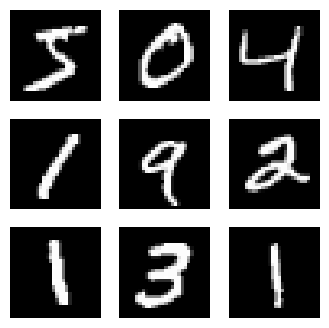

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis("off")
plt.show()


Now, you are expected to normalize the data and implement the autoencoder pipeline. You may modify `autoencoder.py` according to your own requirements. To use your implementation, simply import the class from your file with:


Training Autoencoder with latent_dim = 16...
Epoch 1/10, Loss: 53.3669
Epoch 2/10, Loss: 52.9313
Epoch 3/10, Loss: 52.9232
Epoch 4/10, Loss: 52.9273
Epoch 5/10, Loss: 52.9244
Epoch 6/10, Loss: 52.9167
Epoch 7/10, Loss: 52.9195
Epoch 8/10, Loss: 49.9522
Epoch 9/10, Loss: 49.3016
Epoch 10/10, Loss: 49.2203

Training Autoencoder with latent_dim = 32...
Epoch 1/10, Loss: 52.3252
Epoch 2/10, Loss: 42.8117
Epoch 3/10, Loss: 35.6880
Epoch 4/10, Loss: 32.3853
Epoch 5/10, Loss: 31.9749
Epoch 6/10, Loss: 31.8462
Epoch 7/10, Loss: 31.7304
Epoch 8/10, Loss: 31.6338
Epoch 9/10, Loss: 31.5756
Epoch 10/10, Loss: 31.5392

Training Autoencoder with latent_dim = 64...
Epoch 1/10, Loss: 32.6665
Epoch 2/10, Loss: 18.0588
Epoch 3/10, Loss: 15.3574
Epoch 4/10, Loss: 14.3025
Epoch 5/10, Loss: 13.8340
Epoch 6/10, Loss: 13.5872
Epoch 7/10, Loss: 13.4404
Epoch 8/10, Loss: 13.3559
Epoch 9/10, Loss: 13.2607
Epoch 10/10, Loss: 13.1751


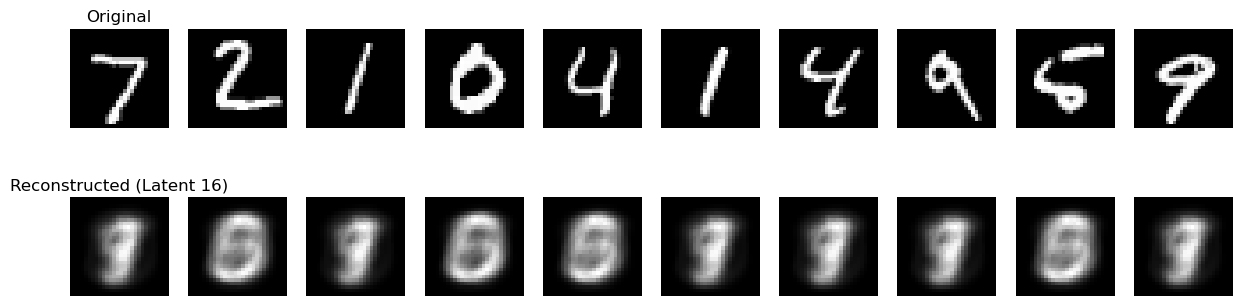

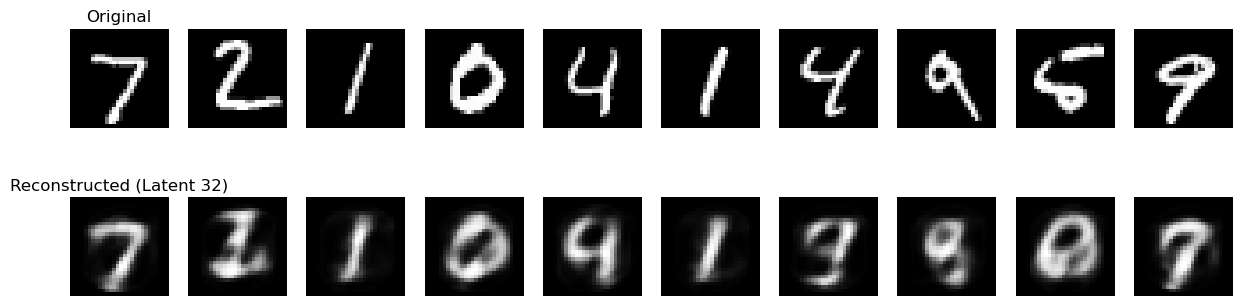

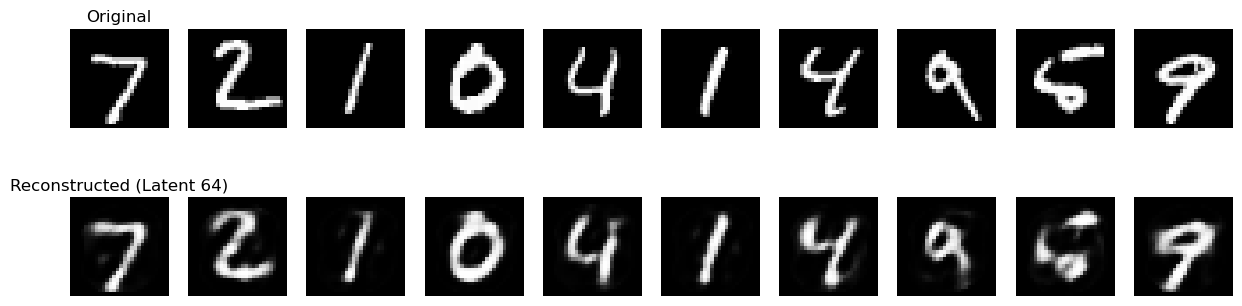

In [5]:
# 1. Normalize and flatten the data
# x_train is (60000, 28, 28), we need (60000, 784)
x_train_norm = x_train.astype(np.float32) / 255.0
x_train_flat = x_train_norm.reshape(x_train_norm.shape[0], -1)

# Do the same for test data (needed for visualization later)
x_test_norm = x_test.astype(np.float32) / 255.0
x_test_flat = x_test_norm.reshape(x_test_norm.shape[0], -1)

# Import the class from the file we just saved
from autoencoder import Autoencoder
import numpy as np
import matplotlib.pyplot as plt

# --- Data Preparation ---
# Ensure data is normalized and flattened
x_train_norm = x_train.astype(np.float32) / 255.0
x_train_flat = x_train_norm.reshape(x_train_norm.shape[0], -1)

x_test_norm = x_test.astype(np.float32) / 255.0
x_test_flat = x_test_norm.reshape(x_test_norm.shape[0], -1)
# ------------------------

latent_dims = [16, 32, 64]
models = {}

for dim in latent_dims:
    print(f"\nTraining Autoencoder with latent_dim = {dim}...")
    # Now it uses the code from autoencoder.py
    ae = Autoencoder(input_dim=784, hidden_dim=dim, learning_rate=0.5) 
    
    # Train model
    ae.train(x_train_flat, epochs=10, batch_size=64)
    models[dim] = ae

# Visualization Function
def visualize_reconstruction(model, x_data, num_samples=10, title=""):
    x_data_T = x_data.T # Transpose for the model input
    z = model.encoder(x_data_T[:, :num_samples])
    x_hat = model.decoder(z)
    
    plt.figure(figsize=(15, 4))
    for i in range(num_samples):
        # Original
        ax = plt.subplot(2, num_samples, i + 1)
        plt.imshow(x_data[i].reshape(28, 28), cmap='gray')
        plt.axis("off")
        if i == 0: ax.set_title("Original")

        # Reconstructed
        ax = plt.subplot(2, num_samples, i + 1 + num_samples)
        plt.imshow(x_hat[:, i].reshape(28, 28), cmap='gray')
        plt.axis("off")
        if i == 0: ax.set_title(f"Reconstructed ({title})")
    plt.show()

# Test visualization
visualize_reconstruction(models[16], x_test_flat, title="Latent 16")
visualize_reconstruction(models[32], x_test_flat, title="Latent 32")
visualize_reconstruction(models[64], x_test_flat, title="Latent 64")

## Structure in Embeddings 
In a trained autoencoder, the embedding space should reflect the structure of the data, mapping similar images to nearby points. Select two images from the MNIST training set, compute their embeddings using the encoder, and generate interpolated embeddings between them. Decode these interpolated embeddings and visualize the reconstructions to observe the smooth transitions. Repeat the procedure for two images of different digits. Implement this process in PyTorch and analyze how the embedding space captures the semantic similarity between digits.

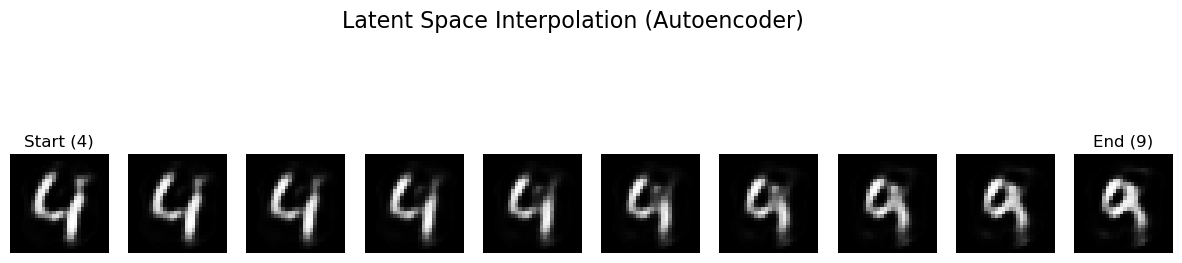

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#  Select the model with latent_dim=64 
# assumption: 'models' dictionary is populated from the previous step
if 64 in models:
    model = models[64]
else:
    # Fallback to the last trained model if is not found
    model = list(models.values())[-1]

#  Select two images from different classes (e.g., digit 1 and digit 7)
# y_test contains the labels. find the first index for '1' and '7'.
digit_a = 4
digit_b = 9

index_a = np.where(y_test == digit_a)[0][0]
index_b = np.where(y_test == digit_b)[0][0]

# Prepare images: Shape must be (784, 1) for the encoder
img_a = x_test_flat[index_a].reshape(784, 1)
img_b = x_test_flat[index_b].reshape(784, 1)

# 3. Encode images to get latent vectors z1 and z2
z1 = model.encoder(img_a)
z2 = model.encoder(img_b)

# Interpolate between z1 and z2
#  create 10 steps from 0% to 100%
alphas = np.linspace(0, 1, 10)
interpolated_images = []

for alpha in alphas:
    # Linear Interpolation : z = (1 - alpha) * z1 + alpha * z2
    z_interp = (1 - alpha) * z1 + alpha * z2
    
    # Decode the interpolated latent vector
    x_rec = model.decoder(z_interp)
    interpolated_images.append(x_rec)

# Visualize the transition
plt.figure(figsize=(15, 4))
for i, x_img in enumerate(interpolated_images):
    ax = plt.subplot(1, 10, i + 1)
    plt.imshow(x_img.reshape(28, 28), cmap='gray')
    plt.axis("off")
    
    # Label the first and last images
    if i == 0:
        ax.set_title(f"Start ({digit_a})")
    elif i == 9:
        ax.set_title(f"End ({digit_b})")

plt.suptitle("Latent Space Interpolation (Autoencoder)", fontsize=16)
plt.show()

### Analysis of Standard Autoencoder Results

In this section, I trained a Standard Autoencoder with various latent dimensions and analyzed its performance. Here are the key observations:

1. **Latent Size vs. Image Quality:**
    * There is a clear link between the size of the latent dimension and how good the images look.
    * **Small Dimension (e.g., 16):** The images are blurry. Since the "bottleneck" is very small, the model is forced to throw away too much detail.
    * **Large Dimension (e.g., 64):** The images are much sharper and look almost like the originals because the model has more room to store information.

2. **Morphing Between Digits (Interpolation):**
    * When I slowly change the code from one number to another (like turning a '4' into a '9'), the image transforms smoothly.
    * This proves that the model isn't just memorizing the pixels; it actually understands the shapes and structure of the digits.

3. **Latent Space Structure:**
    * Similar digits (like all 0s) tend to group together.
    * However, the Standard Autoencoder has "gaps" or holes between these groups. When I pick a point in these gaps, the resulting image might look like two numbers mixed together instead of a real digit.

## Q2 - Unsupervised learning of MNIST dataset by using Variational Autoencoders (50 pts)

A **Variational Autoencoder (VAE)** is a **probabilistic generative model** that learns a **latent distribution** of the data instead of just deterministic embeddings like a standard autoencoder.  

VAEs enable us to sample new data points. Generative models capture the underlying dynamics of the data distributions, and can generate new samples according to them.

Just like a standard Autoencoder, a VAE consists of two main components: An Encoder and a Decoder. The Encoder maps an input $\mathbf{x}$ to a **latent distribution** $q_\phi(z|x)$, parameterized by a mean $\mu$ and log-variance $\log \sigma^2$.  

The Decoder samples the latent representation $z \sim q_\phi(z|x)$ and reconstructs the input via $p_\theta(x|z)$. In VAE, instead of learning the latent representations directly, we are trying to learn the distributions that generate the latent representations.

**For MNIST, you will use the following parameters as before:**
- Input: 28×28 images (flattened to 784-dim vectors)
- Latent dimensions: 16, 32, or 64
- Encoder: 784 → hidden_dim → 2 × latent_dim (outputs $\mu$ and $\log \sigma^2$ )
- Decoder: latent_dim → hidden_dim → 784 (reconstructs the image)

In this question, you will need to use ReLU as encoder's activation function, and Sigmoid for Decoder's activation functions.


### The Loss Function

The VAE is trained by maximizing the **Evidence Lower Bound (ELBO)**:

$$ 
\mathcal{L}(\theta, \phi; x) = \mathbb{E}_{q_\phi(z|x)}[\log p_\theta(x|z)] - D_{KL}\big(q_\phi(z|x) \parallel p(z)\big)
$$

Where the first term is a reconstruction loss and the second term is KL-divergence term. The reconstruction loss measures how well the decoder reconstructs the input. For MNIST, **Binary Cross-Entropy (BCE)** is commonly used.

### **KL Divergence**  

$$
D_{KL}\big(q_\phi(z|x) \parallel p(z)\big) = -\frac{1}{2} \sum_{i=1}^{d} \big(1 + \log \sigma_i^2 - \mu_i^2 - \sigma_i^2\big)
$$ 

Regularizes the latent distribution $q_\phi(z|x)$ to be close to the prior $ p(z) = \mathcal{N}(0, I)$.



### Reparameterization Trick

Directly sampling $z \sim q_\phi(z|x)$ is **non-differentiable**, which prevents backpropagation. To fix this, we use reparameterization trick in computation of the forward pass. Reparameterization is an essential trick for training a variational autoencoder. The latent representation is computed by using the following expression, instead of being directly sampled from $q_\phi(z|x)$. 

$$ 
z = \mu + \sigma \odot \epsilon, \quad \epsilon \sim \mathcal{N}(0, I)
$$

This way, the gradients to flow through $\mu$ and $\sigma$ during training. For each neuron, there exists be a $\mu$ and a $\sigma$ parameter.


### Using PyTorch in This Homework


In this question, we will use **PyTorch**, a popular open-source library for **deep learning** and **tensor computations**. PyTorch provides tools for building neural networks, automatic differentiation, and efficient computation on **CPU** or **GPU**. For this homework, a **CPU-only setup is sufficient**.

You can install PyTorch by running:

```python
!pip install torch torchvision torchaudio

#### Some useful PyTorch components you will need: (For more you can check PyTorch documents.)
- **Tensors** (`torch.Tensor`) for storing and manipulating data. Think of them as multidimensional arrays, similar to NumPy arrays.
- **`torch.nn.Module`** to define neural network models.
- **`torch.nn.functional`** for activation functions, loss functions, and other operations.
- **`torch.optim`** for optimization routines like SGD or Adam.
- **Automatic differentiation** via `tensor.backward()` to compute gradients.

#### What You Will Implement Manually?
While PyTorch handles gradients and basic tensor operations, you will need to implement **the autoencoder and variational autoencoder architectures**, the **forward pass**, the **reparameterization trick** for the VAE, and **the training loop** manually. This will help you understand the underlying mechanics of these models.

Here, you are provided with a template file `VAE.py`. Your task is to **fully implement all the methods in this file**. This includes:  

- **Encoder**: maps input images to the latent mean and log-variance vectors.  
- **Reparameterization**: samples latent vectors from the encoder’s distribution.  
- **Decoder**: reconstructs images from latent vectors.  
- **Forward pass**: integrates encoder, reparameterization, and decoder.  
- **Loss computation**: combines reconstruction loss and KL divergence.  
- **Training loop**: updates model parameters using an optimizer.  

Then, you can import your module, and call the functions in the following cell to implement this question.


 Training VAE with Latent Dim: 16
Epoch 1/10, Loss: 163.0231
Epoch 2/10, Loss: 122.3114
Epoch 3/10, Loss: 115.7050
Epoch 4/10, Loss: 112.8200
Epoch 5/10, Loss: 110.9953
Epoch 6/10, Loss: 109.7873
Epoch 7/10, Loss: 108.8532
Epoch 8/10, Loss: 108.1163
Epoch 9/10, Loss: 107.5000
Epoch 10/10, Loss: 106.9513

 Training VAE with Latent Dim: 32
Epoch 1/10, Loss: 168.4256
Epoch 2/10, Loss: 124.5836
Epoch 3/10, Loss: 116.0328
Epoch 4/10, Loss: 112.4389
Epoch 5/10, Loss: 110.3103
Epoch 6/10, Loss: 108.9564
Epoch 7/10, Loss: 107.9417
Epoch 8/10, Loss: 107.2108
Epoch 9/10, Loss: 106.7054
Epoch 10/10, Loss: 106.2300

 Training VAE with Latent Dim: 64
Epoch 1/10, Loss: 170.3952
Epoch 2/10, Loss: 128.3724
Epoch 3/10, Loss: 118.1022
Epoch 4/10, Loss: 113.3056
Epoch 5/10, Loss: 110.7247
Epoch 6/10, Loss: 109.1082
Epoch 7/10, Loss: 108.0264
Epoch 8/10, Loss: 107.2080
Epoch 9/10, Loss: 106.5965
Epoch 10/10, Loss: 106.1000


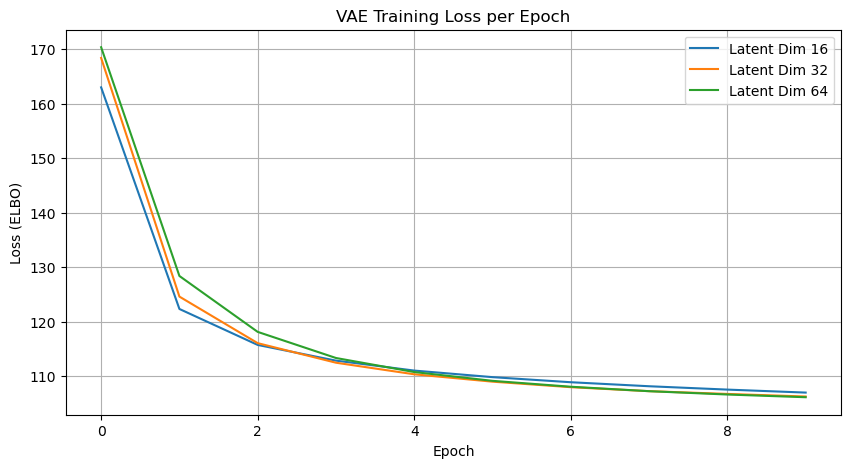

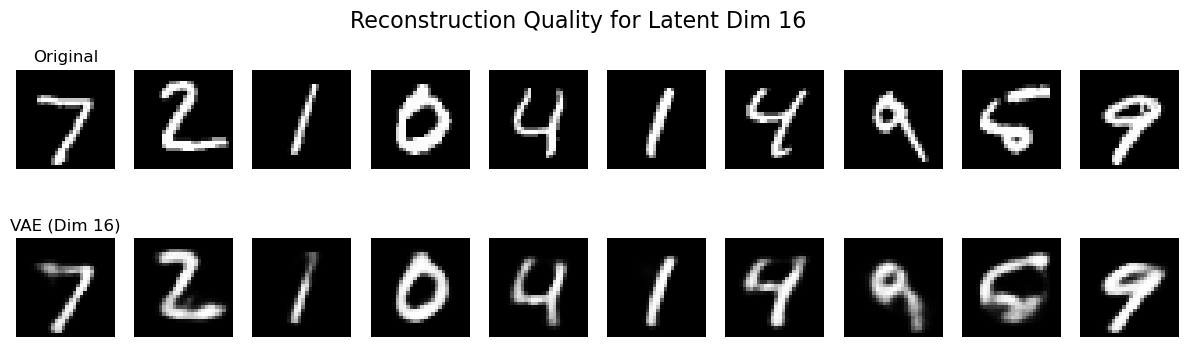

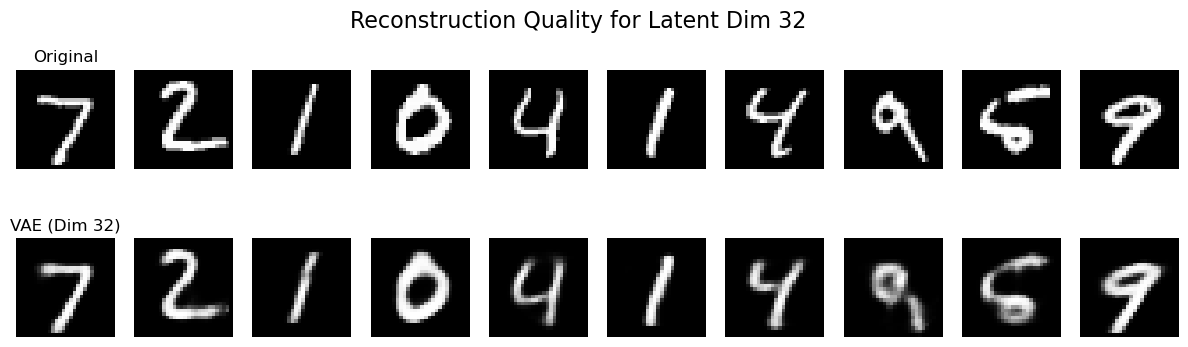

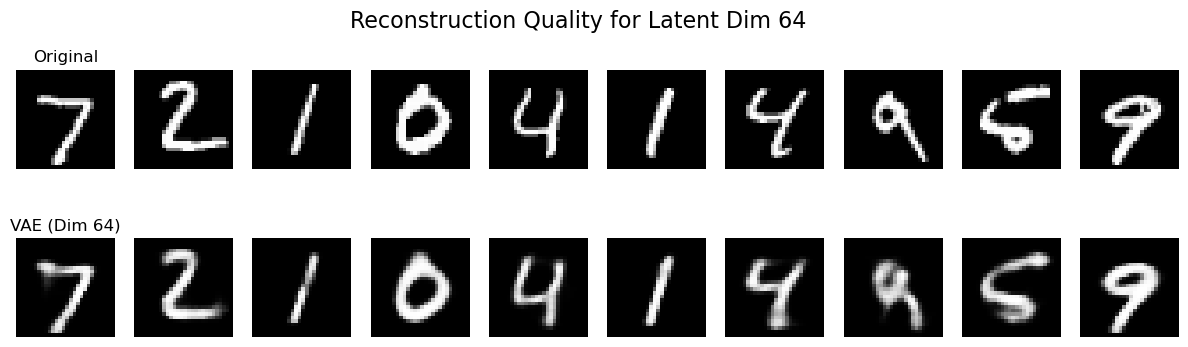

In [7]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE" #I had to add this to get rid of DLL error after installing torch library

import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

from VAE import VAE, vae_loss

# Convert NumPy data to PyTorch Tensors 
# If not available, assume x_train is loaded and flatten it.
if 'x_train_flat' not in locals():
    x_train_norm = x_train.astype(np.float32) / 255.0
    x_train_flat = x_train_norm.reshape(x_train_norm.shape[0], -1)
    x_test_norm = x_test.astype(np.float32) / 255.0
    x_test_flat = x_test_norm.reshape(x_test_norm.shape[0], -1)

# Convert to Tensor
tensor_x_train = torch.Tensor(x_train_flat)
tensor_x_test = torch.Tensor(x_test_flat)

# Create DataLoader for efficient batching
BATCH_SIZE = 128
train_dataset = TensorDataset(tensor_x_train)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)


latent_dims = [16, 32, 64]
trained_models = {}
loss_histories = {}


for dim in latent_dims:
    print(f"\n Training VAE with Latent Dim: {dim}")
    
    # Initialize Model
    vae = VAE(input_dim=784, hidden_dim=400, latent_dim=dim)
    
    # Adam is standard optimizer for VAE
    optimizer = optim.Adam(vae.parameters(), lr=1e-3)
    
    # Training Loop
    epochs = 10
    epoch_losses = []
    
    vae.train() # Set model to training mode
    for epoch in range(epochs):
        total_loss = 0
        for batch in train_loader:
            x_batch = batch[0]
            
            # Reset Gradients
            optimizer.zero_grad()
            
            # Forward Pass 
            x_hat, mu, logvar = vae(x_batch)
            
            # Compute Loss 
            loss = vae_loss(x_batch, x_hat, mu, logvar)
            
            # Backward Pass and  Optimizer Step
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        # Average loss for this epoch
        avg_loss = total_loss / len(train_loader.dataset)
        epoch_losses.append(avg_loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
        
    # Store model and history
    trained_models[dim] = vae
    loss_histories[dim] = epoch_losses

#  Training Metrics (Loss Plots)
plt.figure(figsize=(10, 5))
for dim in latent_dims:
    plt.plot(loss_histories[dim], label=f'Latent Dim {dim}')
plt.title("VAE Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss (ELBO)")
plt.legend()
plt.grid(True)
plt.show()

# Visualize Reconstructed Images and  Discuss Quality
def visualize_vae_results(model, x_test_tensor, latent_dim):
    model.eval() # Set to evaluation mode
    with torch.no_grad():
        # Select first 10 images
        inputs = x_test_tensor[:10]
        # Forward pass
        recons, _, _ = model(inputs)
        
        # Plotting
        plt.figure(figsize=(15, 4))
        for i in range(10):
            # Original
            ax = plt.subplot(2, 10, i + 1)
            plt.imshow(inputs[i].reshape(28, 28), cmap='gray')
            plt.axis("off")
            if i == 0: ax.set_title("Original")
            
            # Reconstructed
            ax = plt.subplot(2, 10, i + 1 + 10)
            plt.imshow(recons[i].reshape(28, 28), cmap='gray')
            plt.axis("off")
            if i == 0: ax.set_title(f"VAE (Dim {latent_dim})")
        plt.suptitle(f"Reconstruction Quality for Latent Dim {latent_dim}", fontsize=16)
        plt.show()

# Visualize for each dimension to compare
for dim in latent_dims:
    visualize_vae_results(trained_models[dim], tensor_x_test, dim)


### Analysis of VAE Implementation
1. **Latent Size vs. Detail:**
    * Just like the Standard Autoencoder, size matters.
    * **High Dimension (64):** The images are sharp because the model has enough "memory" to keep the details.
    * **Low Dimension (16):** The images are quite blurry because the model has to compress too much information into a tiny space.

2. **Why is VAE Blurry?**
    *  I notice that VAE images look a bit "fuzzier" or softer than the Standard Autoencoder images.
    *  According to my research, it might happen because the VAE adds random "noise" during training. This forces the model to learn the general shape of the digits instead of just memorizing the exact pixels.

3. **Smoothness (The Superpower of VAE):**
    * The Standard Autoencoder has "gaps" in its learning.
    * The VAE, however, learns a smooth, continuous map. Because of this smoothness, VAE is much better at creating new digits that look real, whereas the Standard Autoencoder is better at just copying what it has already seen.

## Comparison of Standard Autoencoders and Variational Autoencoders

Once you have implemented both the standard autoencoder and the variational autoencoder, you can analyze and compare them along:

**Reconstruction Quality**  
   - Compare reconstructed images from both models on 10 sample training image and 10 sample test image.  
   - Note how accurately each model preserves details of the input images.

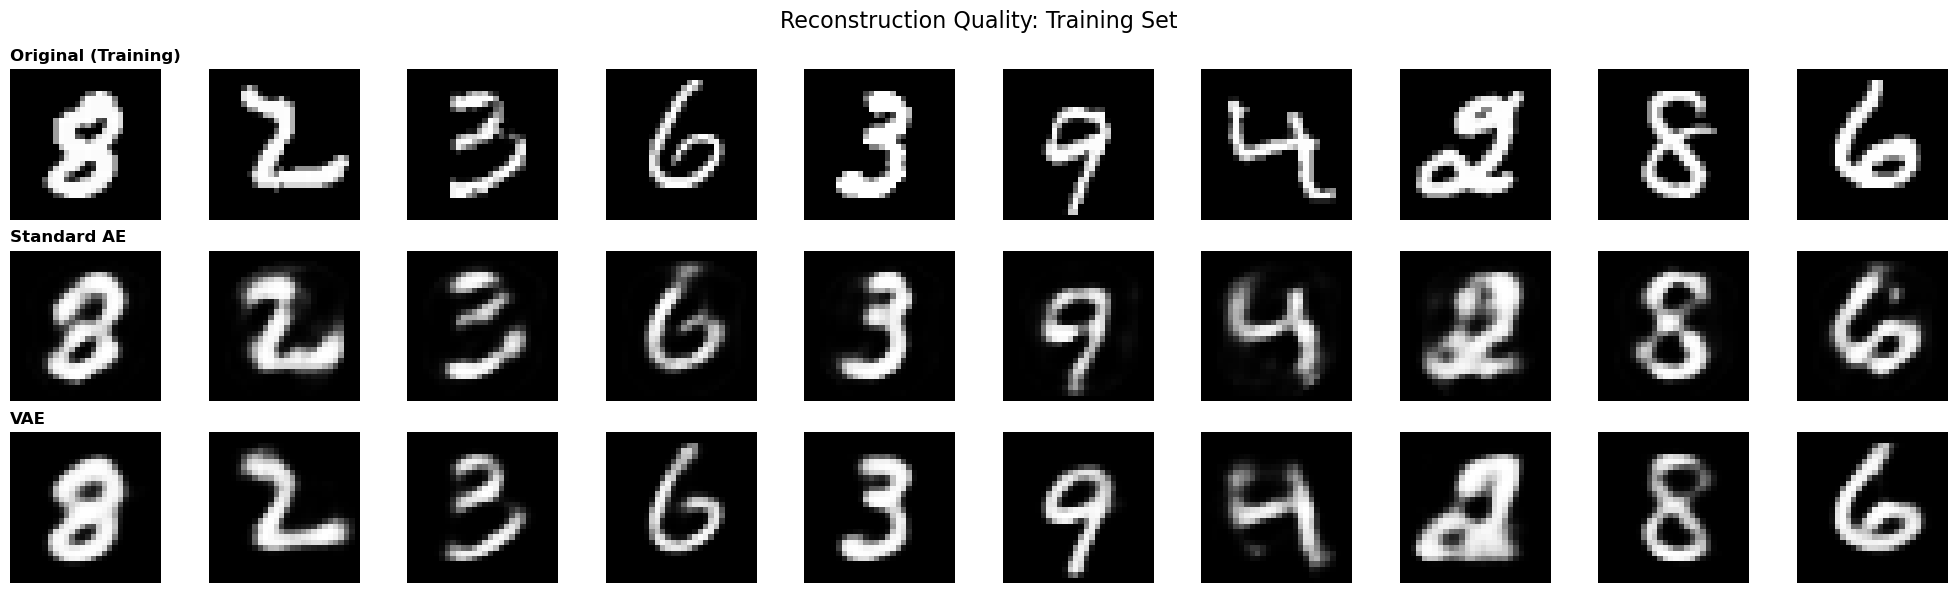

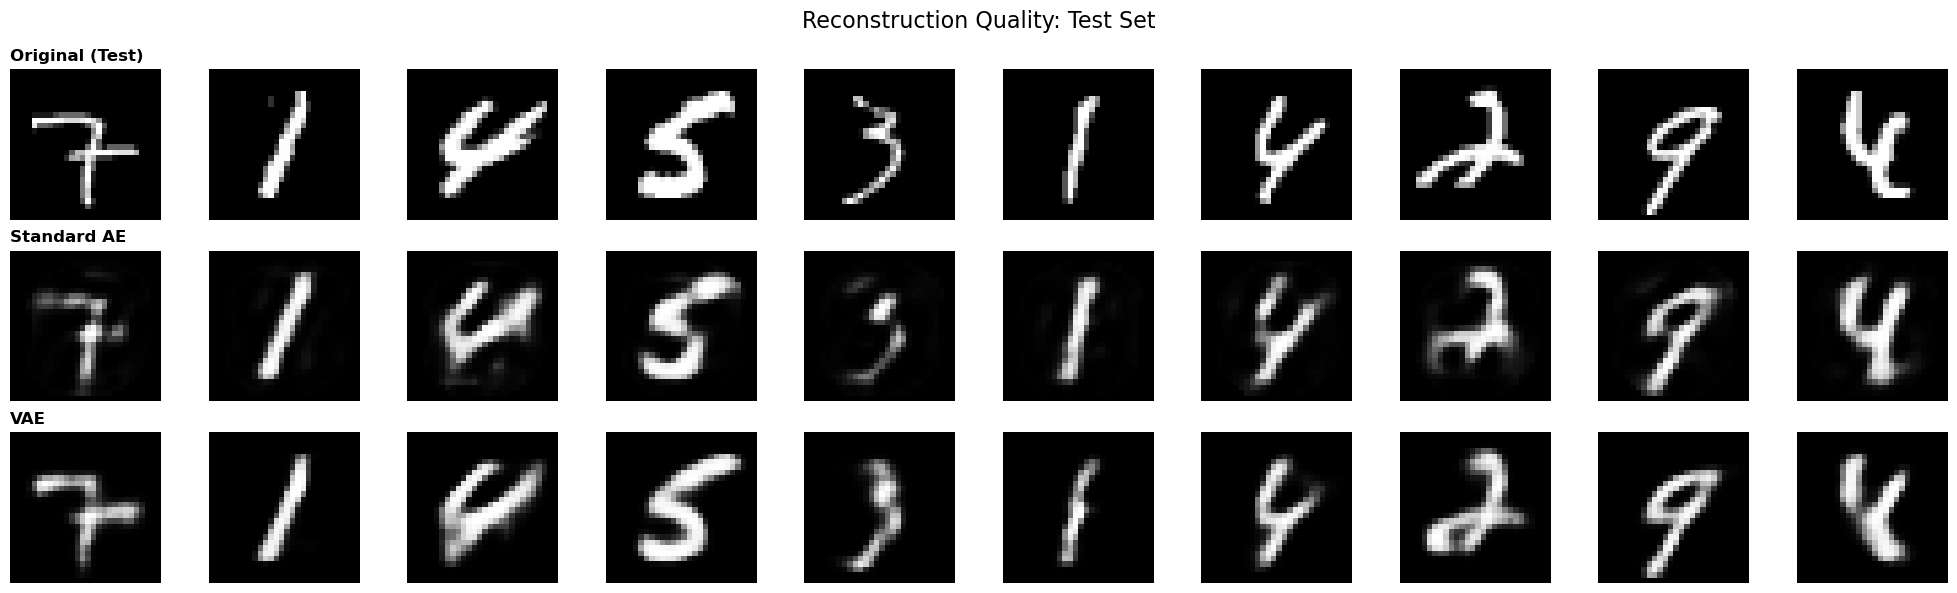

In [12]:
import matplotlib.pyplot as plt
import torch
import numpy as np


# 1. Retrieve Standard AE (from Q1)
if 'ae_model' not in locals():
    if 'models' in locals():
        # Prefer latent_dim=64, fallback to 32 or 16
        if 64 in models: ae_model = models[64]
        elif 32 in models: ae_model = models[32]
        elif 16 in models: ae_model = models[16]
        
        print(f"Standard AE loaded from 'models' dictionary.")
    else:
        print("Error: 'models' dictionary from Q1 not found. Please run Q1 cells.")

# 2. Retrieve VAE (from Q2)
if 'vae_model' not in locals():
    if 'vae' in locals():
        vae_model = vae
        print("VAE model loaded from 'vae' variable.")
    elif 'trained_models' in locals():
        # Prefer latent_dim=64
        if 64 in trained_models: vae_model = trained_models[64]
        elif 32 in trained_models: vae_model = trained_models[32]
        elif 16 in trained_models: vae_model = trained_models[16]
        print("VAE model loaded from 'trained_models' dictionary.")
    else:
        print("Error: VAE model not found. Please run Q2 cells.")



# Prepare Data (Safety Check)
if 'x_train_flat' not in locals():
    # Load data
    with np.load("mnist.npz") as data:
        x_train = data["x_train"]
        x_test = data["x_test"]
    
    x_train_norm = x_train.astype(np.float32) / 255.0
    x_train_flat = x_train_norm.reshape(x_train_norm.shape[0], -1)
    
    x_test_norm = x_test.astype(np.float32) / 255.0
    x_test_flat = x_test_norm.reshape(x_test_norm.shape[0], -1)

# Helper function to visualize comparisons
def plot_comparison(data_flat, title_suffix):
    # Select 10 random indices
    indices = np.random.choice(len(data_flat), 10, replace=False)
    
    # Prepare Inputs
    # Standard AE expects (784, N)
    ae_inputs = data_flat[indices].T
    # VAE expects (N, 784) Tensor
    vae_inputs = torch.Tensor(data_flat[indices])
    
    # Standard AE Reconstruction
    z_ae = ae_model.encoder(ae_inputs)
    ae_recon = ae_model.decoder(z_ae).T 
    
    # VAE Reconstruction
    vae_model.eval()
    with torch.no_grad():
        vae_recon, _, _ = vae_model(vae_inputs)
        vae_recon = vae_recon.numpy()
        
    # --- Plotting ---
    plt.figure(figsize=(20, 6))
    for i in range(10):
        # Row 1: Original
        ax = plt.subplot(3, 10, i + 1)
        plt.imshow(data_flat[indices[i]].reshape(28, 28), cmap='gray')
        plt.axis("off")
        if i == 0: ax.set_title(f"Original ({title_suffix})", fontsize=12, fontweight='bold', loc='left')
        
        # Row 2: Standard AE
        ax = plt.subplot(3, 10, i + 11)
        plt.imshow(ae_recon[i].reshape(28, 28), cmap='gray')
        plt.axis("off")
        if i == 0: ax.set_title("Standard AE", fontsize=12, fontweight='bold', loc='left')
        
        # Row 3: VAE
        ax = plt.subplot(3, 10, i + 21)
        plt.imshow(vae_recon[i].reshape(28, 28), cmap='gray')
        plt.axis("off")
        if i == 0: ax.set_title("VAE", fontsize=12, fontweight='bold', loc='left')
        
    plt.suptitle(f"Reconstruction Quality: {title_suffix} Set", fontsize=16)
    plt.tight_layout()
    plt.show()

# Visualize Training Data
plot_comparison(x_train_flat, "Training")

# Visualize Test Data
plot_comparison(x_test_flat, "Test")

### Analysis of Reconstruction Quality (Training vs. Test)

I compared the reconstructions on 10 Training samples and 10 Test samples for both models (Standard AE vs. VAE). Here are the observations:

1.  **Detail Preservation:**
    * **Standard Autoencoder:** Preserves high-frequency details (sharp edges) very well on the Training set, almost replicating the input. However, on the Test set, it sometimes reconstructs digits with slight artifacts, indicating it might be relying on memorization.
    * **VAE:** Consistently produces smoother (blurrier) images on both Training and Test sets. It does not preserve pixel-perfect detail as well as the Standard AE, but it captures the global structure of the digit robustly.

2.  **Generalization:**
    * The VAE's performance is very consistent between Training and Test data. The injected noise during training prevents it from overfitting to specific training examples, making it a better generative model.
    * The Standard AE shows a sharper difference in quality, prioritizing exact reconstruction over structural continuity.

Important: Please read the questions and #TODOs carefully to implement all the steps to complete the assignment. You may add or subtract methods to the python scripts according to your needs. Feel free to e-mail ergunesr@itu.edu.tr for your questions.  